In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 1. 데이터 로딩 및 기본 탐색
문제 1. `Wholesale customers data.csv` 파일을 읽어 `df`라는 DataFrame으로 저장하세요.<br>
문제 2. `df.shape`와 `df.head()`를 출력하여 데이터 크기와 예시 행을 확인하세요.<br>
문제 3. `df.info()`와 `df.describe()`로 각 변수의 타입과 기초 통계를 확인하세요.<br>
문제 4. `df['Channel'].value_counts()` 및 `df['Region'].value_counts()`를 출력하고, 어떤 채널/지역 고객이 많은지 주석으로 코멘트하세요.

In [13]:
# 문제1
df = pd.read_csv("./data/13_Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
# 문제2
print(df.shape)
print(df.head())

(440, 8)
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [9]:
# 문제3
print("="*30,"info","="*30)
print(df.info())
print("="*30,"describe","="*30)
print(df.describe())

============================== info ==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
============================== describe ==============================
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   1264

In [10]:
#문제4
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [11]:
df["Region"].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

포르투갈의 도매 유통업체 고객은 다른 지역 호텔/식당/카페에서 돈을 주로 쓰는것을 알 수 있습니다.

## 2. 전처리 및 스케일링 준비
군집 분석은 거리 기반이므로 변수 스케일(단위 차이)을 맞춰주는 게 중요합니다.

문제 5. 분석용 특징 행렬만 추출해서 `df_features`라는 이름으로 저장하세요. (`Channel`, `Region`은 제외합니다.)<br>
문제 6. `StandardScaler`를 사용해 `df_features`를 스케일링하고, 결과를 DataFrame으로 되돌린 `scaler_data`를 만드세요. (컬럼명은 동일하게 유지)<br>
문제 7. 스케일링 전후의 분포 차이를 설명하기 위해 `df_features.describe()`와 `scaler_data.describe()`를 각각 확인한 뒤 주석으로 차이를 적으세요.

In [16]:
# 문제5
df_features = df.drop(["Channel","Region"],axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# 문제6
scaler = StandardScaler()

In [20]:
scaled = scaler.fit_transform(df_features)
scaler_data = pd.DataFrame(scaled,columns=df_features.columns)
scaler_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [21]:
# 문제7
df_features.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [22]:
scaler_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


스케일링을 한 후 표준편차가 1에 가까워 졌고,평균 값이 0에 가깝게 조정되었습니다.

## 3. 계층적 군집 (Hierarchical Clustering)
문제 8. `scipy.cluster.hierarchy`의 `linkage`와 `dendrogram`을 사용해 덴드로그램을 그리세요.
- 그림 크기는 `(20,10)`으로 설정하고,
- 제목은 `'Complete linkage Dendrogram'`으로 설정하고,
- `method='complete'`를 사용하세요.

문제 9. 덴드로그램을 보고, 자연스럽게 나뉠 것 같은 군집 수(k)를 몇 개로 볼 수 있을지 주석으로 적으세요. (예: '높은 높이에서 크게 갈라지는 분기 수를 보고 판단')

In [23]:
import scipy.cluster.hierarchy as  shc

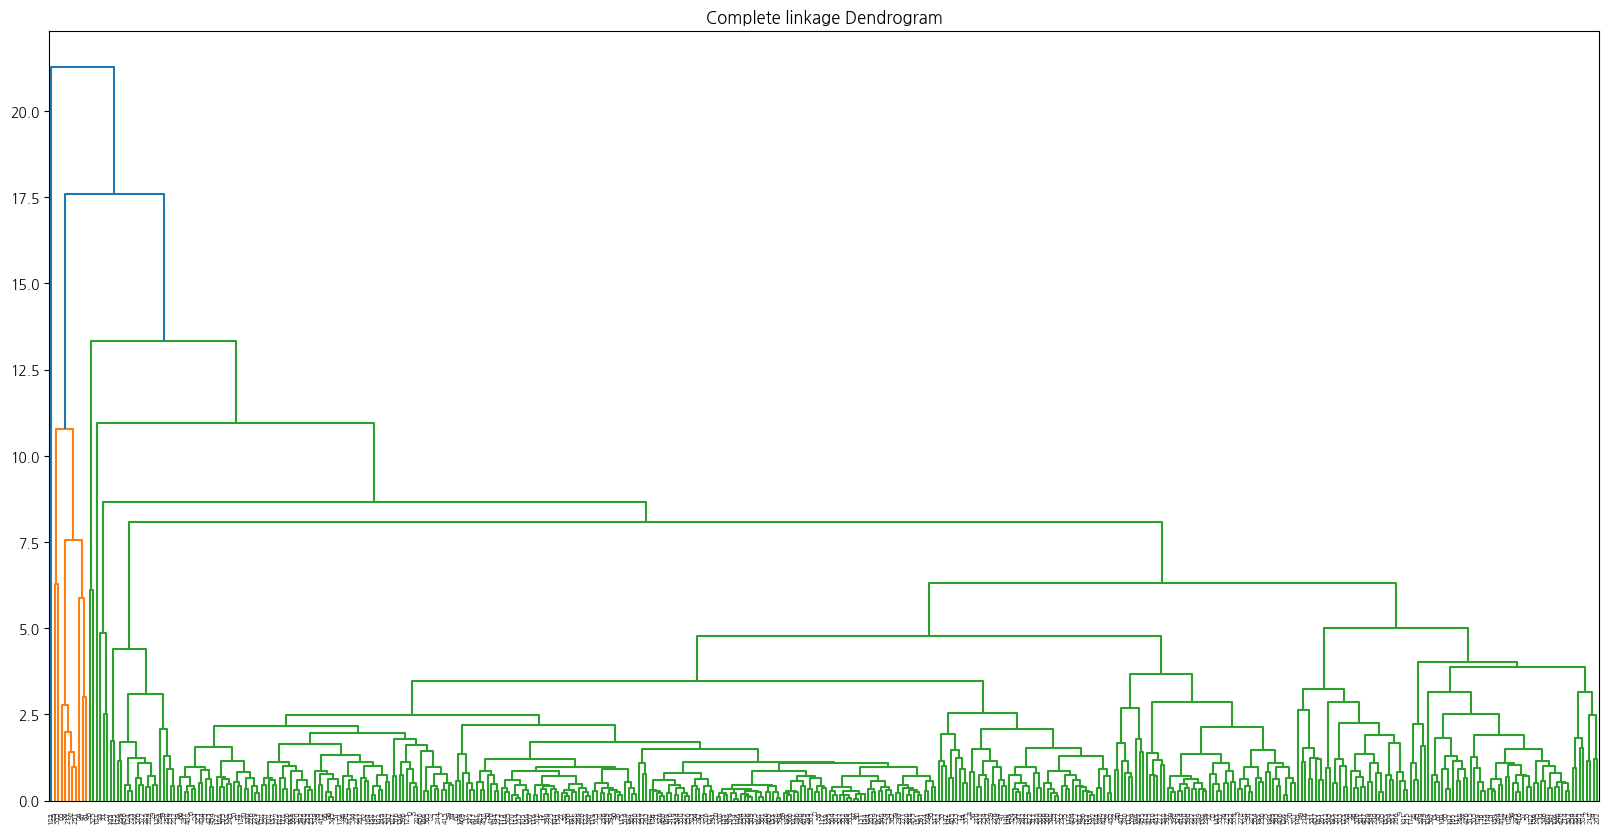

In [24]:
# 문제8
plt.figure(figsize=(20,10))
plt.title("Complete linkage Dendrogram")
dend = shc.dendrogram(shc.linkage(scaler_data,method="complete"))
plt.show()

문제9<br>
자연스럽게 나뉠 것 같은 군집 수는 3개 이며 2번 째로 높은 위치에서 갈라지면서 같은 군집에서 나누어지기 때문에 3개라고 생각합니다.

## 4. KMeans 군집 분석
문제 10. `KMeans(n_clusters=3, random_state=42)`로 KMeans 모델을 학습시키고, 예측된 군집 라벨을 `df['cluster']` 컬럼으로 추가하세요.<br>
문제 11. 각 군집(cluster=0,1,2)의 평균 특성을 비교하세요.
- `df.groupby('cluster')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()`<br>

문제 12. 위 결과를 해석해보세요. 예: 'cluster 0은 Fresh 지출이 매우 높고 Grocery도 많으므로 대형 신선식품 고객군 같다'와 같이 비즈니스 관점에서 요약하세요.

In [25]:
from sklearn.cluster import KMeans

In [28]:
# 문제10
km = KMeans(n_clusters=3,random_state=42)
km.fit(scaler_data)
result = km.labels_
df['cluster'] = result
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,0


In [29]:
df.groupby('cluster')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351


문제11<br>
0 군집은 평균적으로 모든 식품이나 생활 품에 돈을 사용하는 반면<br>
1 군집은 Fresh,Frozen,Delicassen에 대한 소비가 가장 높으며<br>
2 군집은 Milk ,Grocery,Detergents_Paper에 대한 소비가 가장 높았습니다.

문제12<br>
0 군집은 신선제품을 선호하는 반면<br>
1 군집은 냉동,신선 제품을 집단 중에서 제일 많이 소비하면서 품질 또한 많이 소비하는 것을 알 수 있습니다.<br>
2 군집은 세제와 식료품점에 돈을 가장 많이 소비하며 군집 분석을 통해 알 수 있었습니다.

## 5. 최적 군집 수 (Elbow / Silhouette)
문제 13. 엘보우 방식:
- k를 2부터 10까지 바꿔가며 KMeans를 학습시키고,
- inertia 값을 리스트로 저장한 다음,
- `plt.plot(range(2,11), inertia, marker='o')` 형태로 그래프를 그리세요.

문제 14. 실루엣 방식:
- `silhouette_score`를 이용해 k=2~10의 실루엣 점수를 계산하고,
- 마찬가지로 선 그래프로 그리세요.

문제 15. 두 그래프를 근거로 적절해 보이는 k를 하나 고르고, 왜 그렇게 생각했는지 주석으로 작성하세요.

In [ ]:
# 문제13